# Books Goodreader

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! head -n 2 books-goodreader.csv

bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
1,Harry Potter and the Half-Blood Prince (Harry Potter  #6),J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249


In [3]:
! wc -l books-goodreader.csv #Tiene 13720 filas
! awk -F, '{print NF; exit}' books-goodreader.csv #Para saber el número de columnas

   13720 books-goodreader.csv
10


In [4]:
df = pd.read_csv("books-goodreader.csv", sep=',', error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [5]:
print(df.shape)
df.describe().round(decimals=0)


(13714, 10)


,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.0,13714.0,1.371400e+04,13714.0,13714.0,13714.0
mean,22160.0,4.0,9.764017e+12,342.0,17765.0,534.0
std,13701.0,0.0,3.987679e+11,253.0,112957.0,2529.0
min,1.0,0.0,8.987060e+09,0.0,0.0,0.0
25%,10619.0,4.0,9.780345e+12,196.0,83.0,7.0
50%,21322.0,4.0,9.780613e+12,301.0,630.0,40.0
75%,33312.0,4.0,9.780940e+12,421.0,4742.0,222.0
max,47709.0,5.0,9.790008e+12,6576.0,5629932.0,93619.0


In [7]:
df.sample(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
3080,9592,Mother Night,Kurt Vonnegut,4.22,0385334141,9780385334143,eng,282,61277,2187
8925,28668,Ships of Merior (Wars of Light and Shadow #2),Janny Wurts,3.87,0061054658,9780061054655,eng,637,1170,25
6662,20086,The Mark of the Crown (Star Wars: Jedi Apprent...,Jude Watson,3.72,0590519344,9780590519342,eng,131,2247,63


In [7]:
np.mean(df['ratings_count'])

17765.397258276214

In [8]:
df[df['language_code'] == 'spa'].count()

bookID                419
title                 419
authors               419
average_rating        419
isbn                  419
isbn13                419
language_code         419
# num_pages           419
ratings_count         419
text_reviews_count    419
dtype: int64

In [9]:
df[df['language_code'] == 'spa'].count()

bookID                419
title                 419
authors               419
average_rating        419
isbn                  419
isbn13                419
language_code         419
# num_pages           419
ratings_count         419
text_reviews_count    419
dtype: int64

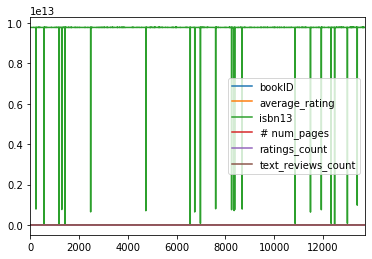

In [11]:
df.plot()

In [15]:
df_per_date =df.groupby("average_rating").count()
df_per_date.sample(6)

,bookID,title,authors,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
average_rating,,,,,,,,,
4.05,193,193,193,193,193,193,193,193,193
4.61,8,8,8,8,8,8,8,8,8
3.13,5,5,5,5,5,5,5,5,5
4.80,3,3,3,3,3,3,3,3,3
4.27,101,101,101,101,101,101,101,101,101
3.77,126,126,126,126,126,126,126,126,126


In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


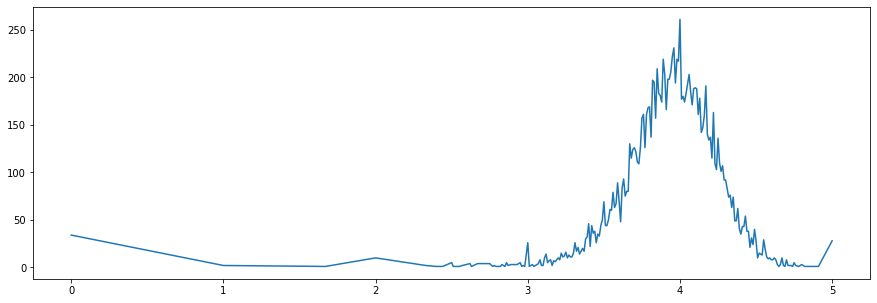

In [23]:
# Así vemos donde se situan los libros
plt.figure(figsize=(15,5))
plt.plot(df_per_date.index, df_per_date["# num_pages"]);
# Se puede ver uan correlación entre número de páginas y puntuación?

In [28]:
df_nooutliners = df[df["# num_pages"] < 2000]

Text(0, 0.5, 'Nota media')

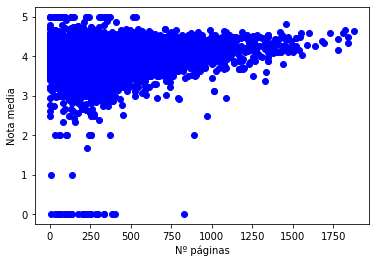

In [29]:
plt.plot(df_nooutliners["# num_pages"], df_nooutliners["average_rating"], "bo")
plt.xlabel("Nº páginas")
plt.ylabel("Nota media")

In [32]:
r = df_nooutliners.corr(method="pearson")["# num_pages"]["average_rating"]
r
#Realmente no hay mucha correlación, pero sí que se ve que muchos libro están entre las notas 3 y 5

0.16175885360497996

In [37]:
df[df["average_rating"] == 0].count()
#Con Varage rating 0

bookID                34
title                 34
authors               34
average_rating        34
isbn                  34
isbn13                34
language_code         34
# num_pages           34
ratings_count         34
text_reviews_count    34
dtype: int64

In [36]:
df[df["ratings_count"] == 0].count()
# Sin ratings 

bookID                114
title                 114
authors               114
average_rating        114
isbn                  114
isbn13                114
language_code         114
# num_pages           114
ratings_count         114
text_reviews_count    114
dtype: int64